___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from warnings import filterwarnings 
filterwarnings('ignore')
import nltk

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [1]:
!pip install matplotlib==3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 4.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [5]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.116.112.154:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.116.112.154:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [6]:
strategy = tf.distribute.TPUStrategy(resolver)

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [7]:
df_org = pd.read_csv('/content/drive/MyDrive/data/Womens Clothing E-Commerce Reviews.csv', index_col=0)

In [8]:
df = df_org.copy()

### Data Wrangling

In [6]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


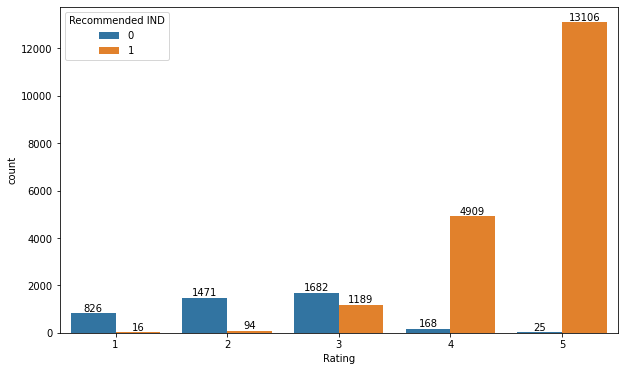

In [16]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

In [25]:
pd.set_option("display.max_rows", 50, "display.max_columns", 50,'display.max_colwidth', 150)
df.loc[((df["Rating"]==1)&(df["Recommended IND"]==1)),"Review Text"]

2427                                                          Beautiful jacket and i got lots of compliments. true to size. it's not thick but it's very warm.
2872              Very cute top. i went down a size because for me it was a little large in the back, but that was just my taste. i purchased the denim print.
5570              I love this t-shirt because it has the combination of elegance and relazation to a "t".\r\nit's soft, pretty and covers my wide bottom well.
6216                                                                                 Love the movement of the blouse and how it falls. great quality material.
7740     I loved the color and design until i tried it on in the store. i am 5'5" with a slender build. i tried my usual xs but couldn't manage to put this...
7850     This is so close to perfect, but there's a seam down the middle of the back and they didn't bother to match the polka dots. you can see the mismat...
9877                                         I

*There is no clarity in customer reviews on rows where both recommed_ind and rating are 1. This situation is same for the rows*
* recommed_ind 2 and rating are 1
* recommed_ind 3 and rating are 1
* recommed_ind 4 and rating are 0
* recommed_ind 5 and rating are 0

*All these reviews include both positive and negative comments. Model could be confused. So they will be dropped.*

In [9]:
df.drop(df.loc[((df["Rating"]==1)&(df["Recommended IND"]==1))].index, inplace=True)
df.drop(df.loc[((df["Rating"]==2)&(df["Recommended IND"]==1))].index, inplace=True)
df.drop(df.loc[((df["Rating"]==3)&(df["Recommended IND"]==1))].index, inplace=True)
df.drop(df.loc[((df["Rating"]==4)&(df["Recommended IND"]==0))].index, inplace=True)
df.drop(df.loc[((df["Rating"]==5)&(df["Recommended IND"]==0))].index, inplace=True)

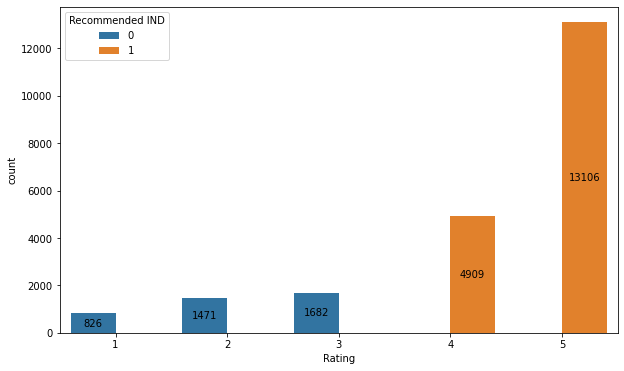

In [30]:
plt.figure(figsize = (10,6))
ax = sns.countplot(x="Rating", data=df, hue = "Recommended IND")
for p in ax.containers:
  ax.bar_label(p, label_type="center")

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

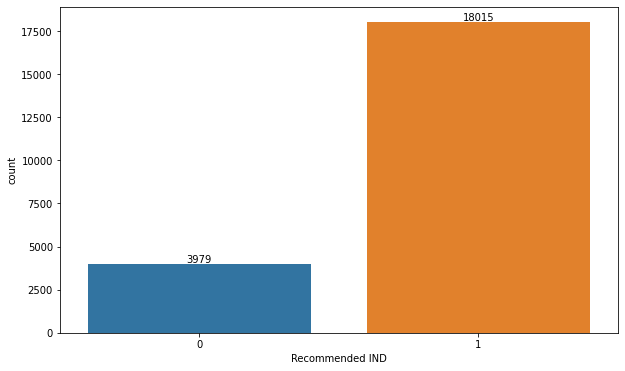

In [31]:
plt.fig = plt.figure(figsize = (10,6))
ax = sns.countplot(x="Recommended IND", data=df)
ax.bar_label(ax.containers[0]);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [10]:
df = df[['Review Text','Recommended IND']]
df.columns = ["text", "label"]
df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [13]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.reset_index(drop=True, inplace=True)

In [13]:
df.tail()

,text,label
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0
21174,This dress in a lovely platinum is feminine an...,1


In [14]:
display(df.label.value_counts(), len(df))

1    17261
0     3914
Name: label, dtype: int64

21175

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

*Remove "not" and "no" from stopwords.*

In [15]:
stop_words = stopwords.words('english')
stop_words.remove("not")
stop_words.remove("no")

In [16]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower())
    
    #2. Remove Puncs and numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [17]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [18]:
positive_sentences = df.loc[df["label"] == 1, "text"]
positive_sentences = positive_sentences.apply(cleaning)
positive_sentences

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

In [19]:
negative_sentences = df.loc[df["label"] == 0, "text"]
negative_sentences = negative_sentences.apply(cleaning)
negative_sentences

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [20]:
positive_words = " ".join(positive_sentences)
positive_words[:1000]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt aded basket hte last mintue see would look like person store pick went teh darkler color pale hte color really gorgeous turn mathced everythiing trying prefectly little baggy hte x hte msallet size bummer no petite decided jkeep though said matvehd everything ejans pant skirt waas trying kept oops ordered carbon store pick ton stuff always try used top pair skirt pant everything went color really nice charcoal shimmer went well pencil skirt flare pant etc compaint bit big sleeve long doesnt go petite also bit loose no xx kept wil ldecide later since light color alread

In [21]:
negative_words = " ".join(negative_sentences)
negative_words[:1000]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could not zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one not petite foot tall usually wear brand dress pretty package lot dress skirt long full overwhelmed small frame not stranger alteration shortening narrowing skirt would take away embellishment garment love color idea style not work returned dress dress run small esp zipper area run ordered sp typically fit tight material top look feel cheap even pulling cause rip fabric pretty disappointed going christmas dress year needle say going back first not pullover styling side zipper wouldnt purchased knew side zipper large bust side zipper next impossible second tulle feel look cheap slip awkward tight shape underneath not look like described sadly returning im sure fi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [22]:
from wordcloud import WordCloud

In [23]:
wordcloud_positive = WordCloud(background_color="white", max_words =250)

In [24]:
wordcloud_positive.generate(positive_words)

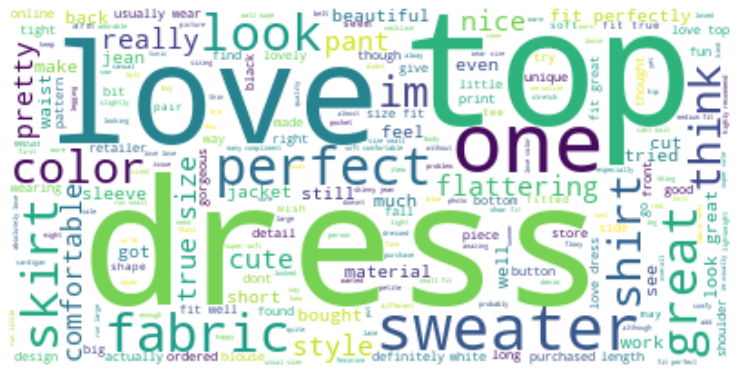

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,13))
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis("off")
plt.show()

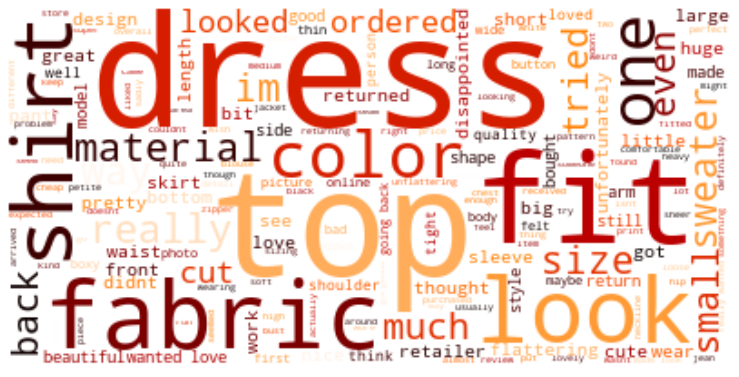

In [26]:
wordcloud_negative = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.show()

*Some most common words like "dress", "top", "fabric", "one" are neutral words. For a more detailed review, these words will be removed from the word cloud and re-examined.*

In [27]:
remove_words = ["dress", "top", "fabric", "one","color"]
positive_words2 = " ".join([i for i in positive_words.split() if i not in remove_words])

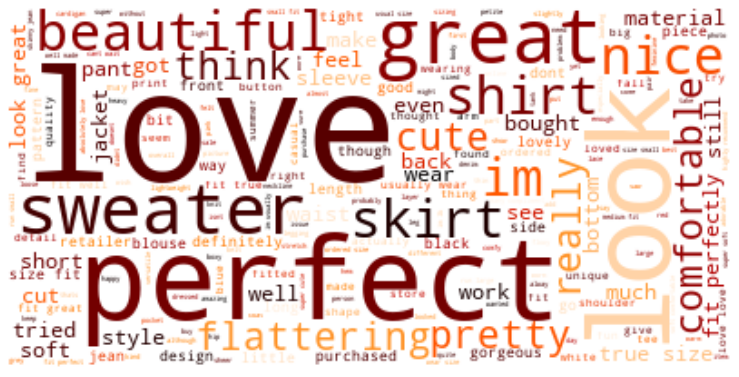

In [28]:
wordcloud_positive2 = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_positive2.generate(positive_words2)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_positive2, interpolation="bilinear")
plt.axis("off")
plt.show()

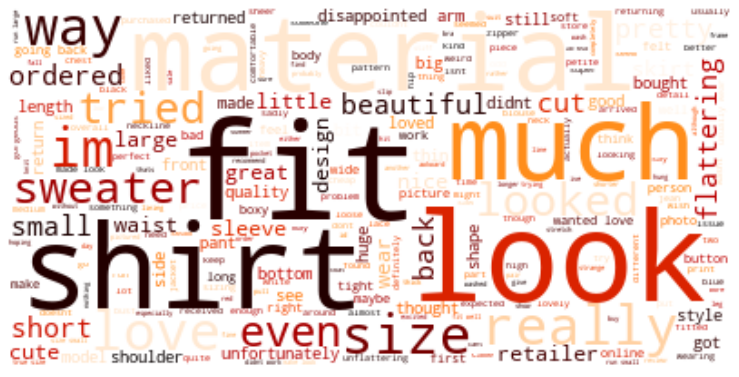

In [29]:
negative_words2 = " ".join([i for i in negative_words.split() if i not in remove_words])

wordcloud_negative2 = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

wordcloud_negative2.generate(negative_words2)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud_negative2, interpolation="bilinear")
plt.axis("off")
plt.show()

*It is seem that while positive comment words like "love, nice, great, perfect" come forward on positive word cloud, "fit, look, shirt, material, size" words come forward on negative words cloud. Negative words are usually related to the size of the clothing. It can be interpreted that people generally complain that the clothes they buy do not fit them properly.*

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X = df["text"].values
y = df["label"].map({0:1, 1:0}).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=5)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [34]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out())

,abdomen,ability,able,absolute,absolutely,abstract,abt,ac,accent,accented,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16938,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [38]:
X_train_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [39]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out())

,abdomen,ability,able,absolute,absolutely,abstract,abt,ac,accent,accented,...,yummy,zero,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16935,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16936,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16937,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16938,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Eval Function

In [40]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [41]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [42]:
def metric_df(model, X_train, y_train, X_test, y_test,name):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    scores = {name: {"accurancy" : accuracy_score(y_test,y_pred),
    "precision" : precision_score(y_test, y_pred),
    "recall" : recall_score(y_test, y_pred),                          
    "f1" : f1_score(y_test,y_pred),
     "True Negative Rate": confusion_matrix(y_test,y_pred)[0][0]/confusion_matrix(y_test,y_pred).sum(),
     "False Positive Rate": confusion_matrix(y_test,y_pred)[0][1]/confusion_matrix(y_test,y_pred).sum(),
    "False Negative Rate": confusion_matrix(y_test,y_pred)[1][0]/confusion_matrix(y_test,y_pred).sum(),
    "True Positive Rate": confusion_matrix(y_test,y_pred)[1][1]/confusion_matrix(y_test,y_pred).sum()}}
    return pd.DataFrame(scores)

## Logistic Regression

### CountVectorizer

In [43]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C =0.08, max_iter=1000, class_weight= "balanced", random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.08, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [44]:
eval(log, X_train_count, X_test_count)

[[3100  352]
 [ 105  678]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3452
           1       0.66      0.87      0.75       783

    accuracy                           0.89      4235
   macro avg       0.81      0.88      0.84      4235
weighted avg       0.91      0.89      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.70      0.94      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.84      0.93      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [45]:
log_reg = metric_df(log, X_train_count, y_train, X_test_count, y_test,"log_reg")
log_reg

,log_reg
False Negative Rate,0.024793
False Positive Rate,0.083117
True Negative Rate,0.731995
True Positive Rate,0.160094
accurancy,0.892090
f1,0.747932
precision,0.658252
recall,0.865900


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring= ["accuracy", "f1", "recall", "precision"]

model = LogisticRegression(C =0.05, max_iter=1000, class_weight= "balanced", random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.886009
test_f1           0.736605
test_recall       0.862029
test_precision    0.643253
dtype: float64

### TF-IDF

In [47]:
log_tf = LogisticRegression(C=0.1, max_iter=1000, random_state=5, class_weight="balanced")
log_tf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=5)

In [48]:
eval(log_tf, X_train_count, X_test_count)

[[3069  383]
 [ 155  628]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3452
           1       0.62      0.80      0.70       783

    accuracy                           0.87      4235
   macro avg       0.79      0.85      0.81      4235
weighted avg       0.89      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.89      0.92     13809
           1       0.63      0.82      0.71      3131

    accuracy                           0.88     16940
   macro avg       0.79      0.86      0.82     16940
weighted avg       0.90      0.88      0.88     16940



In [49]:
log_reg_tf = metric_df(log_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"log_reg_tf")
log_reg_tf

,log_reg_tf
False Negative Rate,0.021724
False Positive Rate,0.103424
True Negative Rate,0.711688
True Positive Rate,0.163164
accurancy,0.874852
f1,0.722803
precision,0.612046
recall,0.882503


In [50]:
df_results = pd.concat([log_reg,log_reg_tf], axis=1)
df_results

,log_reg,log_reg_tf
False Negative Rate,0.024793,0.021724
False Positive Rate,0.083117,0.103424
True Negative Rate,0.731995,0.711688
True Positive Rate,0.160094,0.163164
accurancy,0.892090,0.874852
f1,0.747932,0.722803
precision,0.658252,0.612046
recall,0.865900,0.882503


In [51]:
log_tfcv = LogisticRegression(C=0.08, max_iter=1000, random_state=101, class_weight="balanced")
scores = cross_validate(log_tfcv, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.866883
test_f1           0.709692
test_recall       0.879911
test_precision    0.594804
dtype: float64

## Naive Bayes 

### Countvectorizer

In [52]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB(alpha=0.7)
nb.fit(X_train_count,y_train)

MultinomialNB(alpha=0.7)

In [53]:
eval(nb, X_train_count, X_test_count)

[[3214  238]
 [ 166  617]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.72      0.79      0.75       783

    accuracy                           0.90      4235
   macro avg       0.84      0.86      0.85      4235
weighted avg       0.91      0.90      0.91      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.75      0.86      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.90      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [54]:
nb_ = metric_df(nb, X_train_count, y_train, X_test_count, y_test,"nb")
nb_

,nb
False Negative Rate,0.039197
False Positive Rate,0.056198
True Negative Rate,0.758914
True Positive Rate,0.145691
accurancy,0.904604
f1,0.753358
precision,0.721637
recall,0.787995


In [55]:
df_results = pd.concat([df_results,nb_], axis=1)
df_results

,log_reg,log_reg_tf,nb
False Negative Rate,0.024793,0.021724,0.039197
False Positive Rate,0.083117,0.103424,0.056198
True Negative Rate,0.731995,0.711688,0.758914
True Positive Rate,0.160094,0.163164,0.145691
accurancy,0.892090,0.874852,0.904604
f1,0.747932,0.722803,0.753358
precision,0.658252,0.612046,0.721637
recall,0.865900,0.882503,0.787995


In [56]:
model = MultinomialNB(alpha=0.7)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.902361
test_f1           0.752097
test_recall       0.801023
test_precision    0.709114
dtype: float64

### TF-IDF

In [57]:
nb_tf = BernoulliNB(alpha=0.4)
nb_tf.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.4)

In [58]:
eval(nb_tf, X_train_tf_idf, X_test_tf_idf)

[[3207  245]
 [ 172  611]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3452
           1       0.71      0.78      0.75       783

    accuracy                           0.90      4235
   macro avg       0.83      0.85      0.84      4235
weighted avg       0.91      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     13809
           1       0.75      0.85      0.80      3131

    accuracy                           0.92     16940
   macro avg       0.86      0.89      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [59]:
nb_tf_ = metric_df(nb_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"nb_tf_idf")
nb_tf_

,nb_tf_idf
False Negative Rate,0.040614
False Positive Rate,0.057851
True Negative Rate,0.757261
True Positive Rate,0.144274
accurancy,0.901535
f1,0.745577
precision,0.713785
recall,0.780332


In [60]:
df_results = pd.concat([df_results,nb_tf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf
False Negative Rate,0.024793,0.021724,0.039197,0.040614
False Positive Rate,0.083117,0.103424,0.056198,0.057851
True Negative Rate,0.731995,0.711688,0.758914,0.757261
True Positive Rate,0.160094,0.163164,0.145691,0.144274
accurancy,0.892090,0.874852,0.904604,0.901535
f1,0.747932,0.722803,0.753358,0.745577
precision,0.658252,0.612046,0.721637,0.713785
recall,0.865900,0.882503,0.787995,0.780332


In [61]:
nb_tfcv = BernoulliNB(alpha=0.6)
scores = cross_validate(nb_tfcv, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.900236
test_f1           0.744639
test_recall       0.786970
test_precision    0.706723
dtype: float64

## Support Vector Machine (SVM)

### Countvectorizer

In [62]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=5)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=5)

In [63]:
eval(svc, X_train_count, X_test_count)

[[3109  343]
 [ 106  677]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3452
           1       0.66      0.86      0.75       783

    accuracy                           0.89      4235
   macro avg       0.82      0.88      0.84      4235
weighted avg       0.91      0.89      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.71      0.95      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.85      0.93      0.88     16940
weighted avg       0.94      0.92      0.92     16940



In [64]:
svc_ = metric_df(svc, X_train_count, y_train, X_test_count, y_test,"svc")
svc_

,svc
False Negative Rate,0.025030
False Positive Rate,0.080992
True Negative Rate,0.734120
True Positive Rate,0.159858
accurancy,0.893979
f1,0.750971
precision,0.663725
recall,0.864623


In [65]:
df_results = pd.concat([df_results,svc_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979
f1,0.747932,0.722803,0.753358,0.745577,0.750971
precision,0.658252,0.612046,0.721637,0.713785,0.663725
recall,0.865900,0.882503,0.787995,0.780332,0.864623


In [66]:
svc_cv = LinearSVC(C=0.01, class_weight="balanced", random_state=5)
scores = cross_validate(svc_cv, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.890791
test_f1           0.743774
test_recall       0.857238
test_precision    0.657086
dtype: float64

### TD-IDF

In [67]:
svc_tf = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
svc_tf.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [68]:
eval(svc_tf, X_train_tf_idf, X_test_tf_idf)

[[3092  360]
 [  93  690]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      3452
           1       0.66      0.88      0.75       783

    accuracy                           0.89      4235
   macro avg       0.81      0.89      0.84      4235
weighted avg       0.91      0.89      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     13809
           1       0.70      0.95      0.81      3131

    accuracy                           0.92     16940
   macro avg       0.84      0.93      0.88     16940
weighted avg       0.93      0.92      0.92     16940



In [69]:
svc_tf_ = metric_df(svc_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"svc_tf")
svc_tf_

,svc_tf
False Negative Rate,0.021960
False Positive Rate,0.085006
True Negative Rate,0.730106
True Positive Rate,0.162928
accurancy,0.893034
f1,0.752864
precision,0.657143
recall,0.881226


In [70]:
df_results = pd.concat([df_results,svc_tf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226


In [71]:
svc_tf_cv = LinearSVC(C=0.1, class_weight="balanced", random_state=101)
scores = cross_validate(svc_tf_cv, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.889551
test_f1           0.745526
test_recall       0.875123
test_precision    0.649495
dtype: float64

## Random Forest

### Countvectorizer

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(300, max_depth = 9, random_state = 5, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=300,
                       n_jobs=-1, random_state=5)

In [73]:
eval(rf, X_train_count, X_test_count)

[[3013  439]
 [ 138  645]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3452
           1       0.60      0.82      0.69       783

    accuracy                           0.86      4235
   macro avg       0.78      0.85      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     13809
           1       0.64      0.89      0.75      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.84     16940
weighted avg       0.91      0.89      0.90     16940



In [74]:
rf_ = metric_df(rf, X_train_count, y_train, X_test_count, y_test,"rf")
rf_

,rf
False Negative Rate,0.032586
False Positive Rate,0.103660
True Negative Rate,0.711452
True Positive Rate,0.152302
accurancy,0.863754
f1,0.690948
precision,0.595018
recall,0.823755


In [75]:
df_results = pd.concat([df_results,rf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755


In [76]:
rf_cv = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(rf_cv, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.860685
test_f1           0.683575
test_recall       0.813484
test_precision    0.589817
dtype: float64

### TF-IDF

In [77]:
rf_tf = RandomForestClassifier(300, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
rf_tf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_estimators=300,
                       n_jobs=-1, random_state=42)

In [78]:
eval(rf_tf, X_train_tf_idf, X_test_tf_idf)

[[2985  467]
 [ 136  647]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3452
           1       0.58      0.83      0.68       783

    accuracy                           0.86      4235
   macro avg       0.77      0.85      0.80      4235
weighted avg       0.89      0.86      0.87      4235

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     13809
           1       0.64      0.90      0.75      3131

    accuracy                           0.89     16940
   macro avg       0.81      0.89      0.84     16940
weighted avg       0.91      0.89      0.90     16940



In [79]:
rf_tf_ = metric_df(rf_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"rf_tf")
rf_tf_

,rf_tf
False Negative Rate,0.032113
False Positive Rate,0.110272
True Negative Rate,0.704841
True Positive Rate,0.152774
accurancy,0.857615
f1,0.682130
precision,0.580790
recall,0.826309


In [80]:
df_results = pd.concat([df_results,rf_tf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309


In [81]:
rf_tf_cv = RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(rf_tf_cv, X_train_tf_idf, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.851830
test_f1           0.670376
test_recall       0.814753
test_precision    0.569837
dtype: float64

## Ada Boosting

### Countvectorizer

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [83]:
eval(ada, X_train_count, X_test_count)

[[3314  138]
 [ 269  514]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.79      0.66      0.72       783

    accuracy                           0.90      4235
   macro avg       0.86      0.81      0.83      4235
weighted avg       0.90      0.90      0.90      4235

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     13809
           1       0.86      0.71      0.78      3131

    accuracy                           0.93     16940
   macro avg       0.90      0.84      0.87     16940
weighted avg       0.92      0.93      0.92     16940



In [84]:
ada_ = metric_df(ada, X_train_count, y_train, X_test_count, y_test,"ada")
ada_

,ada
False Negative Rate,0.063518
False Positive Rate,0.032586
True Negative Rate,0.782527
True Positive Rate,0.121370
accurancy,0.903896
f1,0.716376
precision,0.788344
recall,0.656450


In [85]:
df_results = pd.concat([df_results,ada_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf,ada
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113,0.063518
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272,0.032586
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841,0.782527
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774,0.121370
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615,0.903896
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130,0.716376
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790,0.788344
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309,0.656450


In [86]:
ada_cv = AdaBoostClassifier(n_estimators= 500, random_state = 42, learning_rate=0.8)
scores = cross_validate(ada_cv, X_train_count, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.902184
test_f1           0.707570
test_recall       0.640696
test_precision    0.790613
dtype: float64

### TF-IDF

In [87]:
ada_tf = AdaBoostClassifier(n_estimators= 200, random_state = 5, learning_rate=0.8)
ada_tf.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=5)

In [88]:
eval(ada_tf, X_train_tf_idf, X_test_tf_idf)

[[3308  144]
 [ 302  481]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3452
           1       0.77      0.61      0.68       783

    accuracy                           0.89      4235
   macro avg       0.84      0.79      0.81      4235
weighted avg       0.89      0.89      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     13809
           1       0.83      0.67      0.74      3131

    accuracy                           0.91     16940
   macro avg       0.88      0.82      0.84     16940
weighted avg       0.91      0.91      0.91     16940



In [89]:
ada_tf_ = metric_df(ada_tf, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"ada_tf")
ada_tf_

,ada_tf
False Negative Rate,0.071311
False Positive Rate,0.034002
True Negative Rate,0.781110
True Positive Rate,0.113577
accurancy,0.894687
f1,0.683239
precision,0.769600
recall,0.614304


In [90]:
df_results = pd.concat([df_results,ada_tf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf,ada,ada_tf
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113,0.063518,0.071311
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272,0.032586,0.034002
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841,0.782527,0.781110
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774,0.121370,0.113577
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615,0.903896,0.894687
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130,0.716376,0.683239
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790,0.788344,0.769600
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309,0.656450,0.614304


## XGBoost

### Countvectorizer

In [91]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators= 600, random_state = 5, 
                    learning_rate=0.1, max_depth=2,n_jobs = -1)
xgb.fit(X_train_count, y_train)

XGBClassifier(max_depth=2, n_estimators=600, n_jobs=-1, random_state=5)

In [92]:
eval(xgb, X_train_count, X_test_count)

[[3366   86]
 [ 347  436]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3452
           1       0.84      0.56      0.67       783

    accuracy                           0.90      4235
   macro avg       0.87      0.77      0.80      4235
weighted avg       0.89      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     13809
           1       0.88      0.60      0.71      3131

    accuracy                           0.91     16940
   macro avg       0.90      0.79      0.83     16940
weighted avg       0.91      0.91      0.90     16940



In [93]:
xgb_ = metric_df(xgb, X_train_count, y_train, X_test_count, y_test,"xgb")
xgb_

,xgb
False Negative Rate,0.081936
False Positive Rate,0.020307
True Negative Rate,0.794805
True Positive Rate,0.102952
accurancy,0.897757
f1,0.668199
precision,0.835249
recall,0.556833


In [94]:
df_results = pd.concat([df_results,xgb_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf,ada,ada_tf,xgb
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113,0.063518,0.071311,0.081936
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272,0.032586,0.034002,0.020307
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841,0.782527,0.781110,0.794805
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774,0.121370,0.113577,0.102952
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615,0.903896,0.894687,0.897757
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130,0.716376,0.683239,0.668199
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790,0.788344,0.769600,0.835249
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309,0.656450,0.614304,0.556833


In [95]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
modelxgb = XGBClassifier(n_estimators=400, random_state = 5, 
                    learning_rate=0.1, max_depth=2,n_jobs = -1)
param_grid = dict(scale_pos_weight=[1,4.41])
cv = RepeatedStratifiedKFold(n_splits=5, random_state=5)
xgb_grid = GridSearchCV(estimator=modelxgb, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='f1')
xgb_grid.fit(X_train_count, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=5),
             estimator=XGBClassifier(max_depth=2, n_estimators=400, n_jobs=-1,
                                     random_state=5),
             n_jobs=-1, param_grid={'scale_pos_weight': [1, 4.41]},
             scoring='f1')

In [96]:
eval(xgb_grid, X_train_count, X_test_count)

[[3009  443]
 [ 111  672]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.92      3452
           1       0.60      0.86      0.71       783

    accuracy                           0.87      4235
   macro avg       0.78      0.86      0.81      4235
weighted avg       0.90      0.87      0.88      4235

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     13809
           1       0.62      0.90      0.73      3131

    accuracy                           0.88     16940
   macro avg       0.80      0.89      0.83     16940
weighted avg       0.91      0.88      0.89     16940



In [97]:
xgb_grid_ = metric_df(xgb_grid, X_train_count, y_train, X_test_count, y_test,"xgb_grid")
xgb_grid_

,xgb_grid
False Negative Rate,0.026210
False Positive Rate,0.104604
True Negative Rate,0.710508
True Positive Rate,0.158678
accurancy,0.869185
f1,0.708114
precision,0.602691
recall,0.858238


In [98]:
df_results = pd.concat([df_results,xgb_grid_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf,ada,ada_tf,xgb,xgb_grid
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113,0.063518,0.071311,0.081936,0.026210
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272,0.032586,0.034002,0.020307,0.104604
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841,0.782527,0.781110,0.794805,0.710508
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774,0.121370,0.113577,0.102952,0.158678
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615,0.903896,0.894687,0.897757,0.869185
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130,0.716376,0.683239,0.668199,0.708114
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790,0.788344,0.769600,0.835249,0.602691
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309,0.656450,0.614304,0.556833,0.858238


### TF-IDF

In [99]:
xgb_tf = XGBClassifier(n_estimators= 600, random_state = 5, 
                    learning_rate=0.1, max_depth=2,n_jobs = -1)
xgb_tf.fit(X_train_tf_idf, y_train)

XGBClassifier(max_depth=2, n_estimators=600, n_jobs=-1, random_state=5)

In [100]:
eval(xgb_tf, X_train_tf_idf, X_test_tf_idf)

[[3377   75]
 [ 347  436]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3452
           1       0.85      0.56      0.67       783

    accuracy                           0.90      4235
   macro avg       0.88      0.77      0.81      4235
weighted avg       0.90      0.90      0.89      4235

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     13809
           1       0.91      0.63      0.75      3131

    accuracy                           0.92     16940
   macro avg       0.92      0.81      0.85     16940
weighted avg       0.92      0.92      0.91     16940



In [101]:
xgb_tf_ = metric_df(xgb_grid, X_train_tf_idf, y_train, X_test_tf_idf, y_test,"xgb_tf")
xgb_tf_

,xgb_tf
False Negative Rate,0.027391
False Positive Rate,0.103188
True Negative Rate,0.711924
True Positive Rate,0.157497
accurancy,0.869421
f1,0.706942
precision,0.604167
recall,0.851852


In [102]:
df_results = pd.concat([df_results,xgb_tf_], axis=1)
df_results

,log_reg,log_reg_tf,nb,nb_tf_idf,svc,svc_tf,rf,rf_tf,ada,ada_tf,xgb,xgb_grid,xgb_tf
False Negative Rate,0.024793,0.021724,0.039197,0.040614,0.025030,0.021960,0.032586,0.032113,0.063518,0.071311,0.081936,0.026210,0.027391
False Positive Rate,0.083117,0.103424,0.056198,0.057851,0.080992,0.085006,0.103660,0.110272,0.032586,0.034002,0.020307,0.104604,0.103188
True Negative Rate,0.731995,0.711688,0.758914,0.757261,0.734120,0.730106,0.711452,0.704841,0.782527,0.781110,0.794805,0.710508,0.711924
True Positive Rate,0.160094,0.163164,0.145691,0.144274,0.159858,0.162928,0.152302,0.152774,0.121370,0.113577,0.102952,0.158678,0.157497
accurancy,0.892090,0.874852,0.904604,0.901535,0.893979,0.893034,0.863754,0.857615,0.903896,0.894687,0.897757,0.869185,0.869421
f1,0.747932,0.722803,0.753358,0.745577,0.750971,0.752864,0.690948,0.682130,0.716376,0.683239,0.668199,0.708114,0.706942
precision,0.658252,0.612046,0.721637,0.713785,0.663725,0.657143,0.595018,0.580790,0.788344,0.769600,0.835249,0.602691,0.604167
recall,0.865900,0.882503,0.787995,0.780332,0.864623,0.881226,0.823755,0.826309,0.656450,0.614304,0.556833,0.858238,0.851852


## DL modeling

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Tokenization

In [104]:
num_words = 15000 
tokenizer = Tokenizer(num_words=num_words) 

In [105]:
tokenizer.fit_on_texts(X)

### Creating word index

In [106]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [107]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [108]:
X_num_tokens = tokenizer.texts_to_sequences(X)

### Maximum number of tokens for all documents¶

In [109]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [110]:
display(f"mean of tokens: {num_tokens.mean()}", f"max of tokens: {num_tokens.max()}")

'mean of tokens: 60.2330106257379'

'max of tokens: 116'

In [111]:
X[num_tokens.argmax()]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [112]:
max_tokens = 116

In [113]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

### Fixing token counts of all documents (pad_sequences)

In [114]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [115]:
X_pad.shape

(21175, 116)

### Train Set Split

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.1, stratify=y, random_state=5)

### Modeling

In [159]:
model = Sequential()

In [119]:
embedding_size = 50

In [160]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))


model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.5))
#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.5))
model.add(GRU(units=24))
model.add(Dense(1, activation='sigmoid'))

In [161]:
optimizer = Adam(lr=0.001)

In [162]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [163]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 116, 50)           750000    
                                                                 
 gru_11 (GRU)                (None, 116, 48)           14400     
                                                                 
 dropout_5 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_12 (GRU)                (None, 24)                5328      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-trainable params: 0
_________________________________________________________________


In [145]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose=1, patience = 2, restore_best_weights=True)

In [146]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
pd.Series(classes_weights).unique()

array([2.70465512, 0.61339642])

In [164]:
model.fit(X_train, y_train, epochs=25, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
149/149 [==============================] - 24s 132ms/step - loss: 0.4266 - recall: 0.7772 - val_loss: 0.3019 - val_recall: 0.9054
Epoch 2/25
149/149 [==============================] - 19s 125ms/step - loss: 0.2249 - recall: 0.9305 - val_loss: 0.3003 - val_recall: 0.9207
Epoch 3/25
149/149 [==============================] - 19s 125ms/step - loss: 0.1634 - recall: 0.9557 - val_loss: 0.3260 - val_recall: 0.8926
Epoch 4/25
149/149 [==============================] - 19s 125ms/step - loss: 0.1364 - recall: 0.9659 - val_loss: 0.2788 - val_recall: 0.8261
Epoch 4: early stopping


### Model evaluation

In [165]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,recall,val_loss,val_recall
0,0.426600,0.777179,0.301877,0.905371
1,0.224939,0.930457,0.300313,0.920716
2,0.163409,0.955720,0.325968,0.892583
3,0.136430,0.965938,0.278790,0.826087


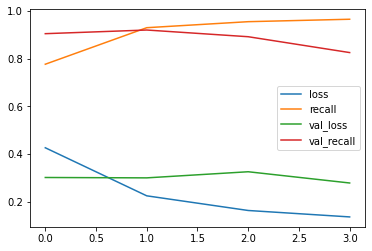

In [166]:
model_loss.plot()

In [167]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = model.predict(X_train) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

[[14005  1529]
 [   48  3475]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.90      0.95     15534
           1       0.69      0.99      0.82      3523

    accuracy                           0.92     19057
   macro avg       0.85      0.94      0.88     19057
weighted avg       0.94      0.92      0.92     19057



In [168]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

[[1513  214]
 [  31  360]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1727
           1       0.63      0.92      0.75       391

    accuracy                           0.88      2118
   macro avg       0.80      0.90      0.84      2118
weighted avg       0.91      0.88      0.89      2118



In [169]:
from sklearn.metrics import precision_recall_curve, average_precision_score

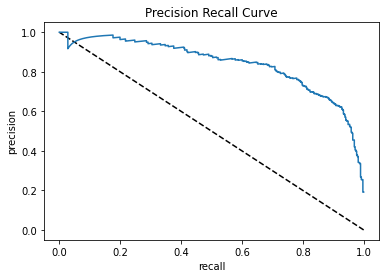

In [170]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')
plt.show()

In [171]:
average_precision_score(y_test, y_pred_proba)

0.8412517107787241

In [172]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [183]:
DL = pd.DataFrame({"accurancy":[np.nan], "f1":[DL_f1], "precision":[DL_AP], "recall":[DL_rec]}).T
DL.columns = ["DL"]

In [184]:
df_results = df_results.iloc[4:]

In [186]:
df_results = pd.concat([df_results, DL], axis=1)

## BERT Modeling

In [187]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 5.1 MB/s 
     |████████████████████████████████| 101 kB 7.6 MB/s 
     |████████████████████████████████| 6.6 MB 26.4 MB/s 
     |████████████████████████████████| 596 kB 40.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


### Tokenization

In [188]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0

# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Max sentence length:  162


In [189]:
np.array(max_token).mean()

76.31556080283353

In [190]:
def transformation(X):
  # set array dimensions
  seq_len = 162
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i, :] = tokens['input_ids']
      Xmask[i, :] = tokens['attention_mask']
  return Xids, Xmask

In [191]:
Xids, Xmask = transformation(X)

In [192]:
Xids.shape, Xmask.shape

((21175, 162), (21175, 162))

In [193]:
labels = y.reshape(-1,1)
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Transformation text to tensor

In [194]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) 

def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

In [195]:
batch_size = 16
length = len(X)
# shuffle and batch
# fit into a batch of 16
dataset = dataset.shuffle(length, reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

### Train test split

In [196]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset)*split) #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

### Creating Model

In [197]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.1, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [198]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5) #3e-5, 5e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [199]:
model3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 162)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 162)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 162,                                           

In [200]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1)

1190/1190 [==============================] - 166s 81ms/step - loss: 0.1813 - recall: 0.7941 - val_loss: 0.1263 - val_recall: 0.8106


### Model evaluation

In [201]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1732
           1       0.89      0.81      0.85       396

    accuracy                           0.95      2128
   macro avg       0.92      0.89      0.91      2128
weighted avg       0.94      0.95      0.94      2128



In [202]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     15524
           1       0.93      0.90      0.91      3516

    accuracy                           0.97     19040
   macro avg       0.96      0.94      0.95     19040
weighted avg       0.97      0.97      0.97     19040



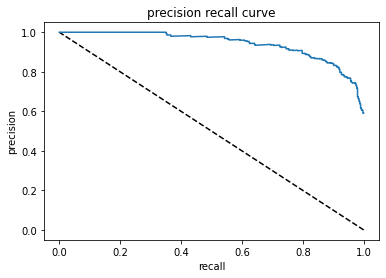

In [203]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model3.predict(val_ds)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [204]:
BERT_without_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_without_weighted_f1 = f1_score(y_test, y_pred)
BERT_without_weighted_rec = recall_score(y_test, y_pred)

In [214]:
Bert = pd.DataFrame({"accurancy":[np.nan], "f1":[BERT_without_weighted_f1], "precision":[BERT_without_weighted_AP], "recall":[BERT_without_weighted_rec]}).T
Bert.columns = ["Bert"]

In [215]:
df_results = pd.concat([df_results, Bert], axis=1)

## BERT Model with Weighted

In [205]:
def create_model():
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = tf.keras.layers.Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(80, activation='relu')(embeddings) 
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [206]:
with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5) #3e-5, 2e-5
  loss = tf.keras.losses.BinaryCrossentropy()
  precision = tf.keras.metrics.Precision()
  model3 = create_model()
  model3.compile(optimizer=optimizer, loss=loss, metrics=[precision])

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [207]:
pd.Series(y).value_counts(normalize=True)

0    0.815159
1    0.184841
dtype: float64

In [208]:
weights = {0:0.2, 1:0.8}

In [209]:
history = model3.fit(
    train_ds, validation_data= val_ds,
    epochs=1, class_weight=weights)

1190/1190 [==============================] - 163s 78ms/step - loss: 0.0802 - precision: 0.6527 - val_loss: 0.1646 - val_precision: 0.7896


In [210]:
y_pred = model3.predict(val_ds) >= 0.5

y_test = [j for i in val_ds for j in np.array(i[1])]


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1732
           1       0.79      0.92      0.85       396

    accuracy                           0.94      2128
   macro avg       0.89      0.93      0.91      2128
weighted avg       0.95      0.94      0.94      2128



In [211]:
y_train_pred = model3.predict(train_ds) >= 0.5

y_train = [j for i in train_ds for j in np.array(i[1])]

print(classification_report(y_train, y_train_pred)) 

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     15524
           1       0.82      0.96      0.89      3516

    accuracy                           0.95     19040
   macro avg       0.91      0.96      0.93     19040
weighted avg       0.96      0.95      0.96     19040



In [212]:
y_pred_proba = model3.predict(val_ds)
average_precision_score(y_test, y_pred_proba)

0.9231776265150247

In [213]:
BERT_with_weighted_AP = average_precision_score(y_test, y_pred_proba)
BERT_with_weighted_f1 = f1_score(y_test, y_pred)
BERT_with_weighted_rec = recall_score(y_test, y_pred)

In [216]:
Bert_w = pd.DataFrame({"accurancy":[np.nan], "f1":[BERT_with_weighted_f1], "precision":[BERT_with_weighted_AP], "recall":[BERT_with_weighted_rec]}).T
Bert_w.columns = ["Bert_w"]

In [217]:
df_results = pd.concat([df_results, Bert_w], axis=1)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [219]:
df_results = df_results.T
df_results

,accurancy,f1,precision,recall
log_reg,0.892090,0.747932,0.658252,0.865900
log_reg_tf,0.874852,0.722803,0.612046,0.882503
nb,0.904604,0.753358,0.721637,0.787995
nb_tf_idf,0.901535,0.745577,0.713785,0.780332
svc,0.893979,0.750971,0.663725,0.864623
svc_tf,0.893034,0.752864,0.657143,0.881226
rf,0.863754,0.690948,0.595018,0.823755
rf_tf,0.857615,0.682130,0.580790,0.826309
ada,0.903896,0.716376,0.788344,0.656450
ada_tf,0.894687,0.683239,0.769600,0.614304


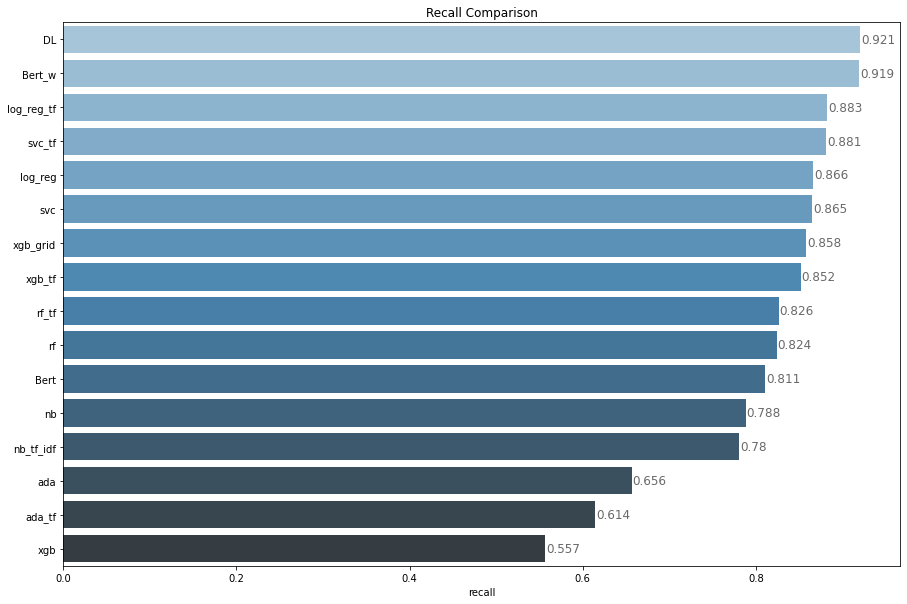

In [231]:
plt.figure(figsize=(15,10))
df_results = df_results.sort_values(by="recall", ascending=False)
ax=sns.barplot(x="recall", y=df_results.index, data=df_results, palette="Blues_d")
for i in ax.patches:
    ax.text(i.get_width()+.001, i.get_y()+.5, \
            str(round((i.get_width()), 3)), fontsize=12, color='dimgrey')
ax.set_title("Recall Comparison")
plt.show()

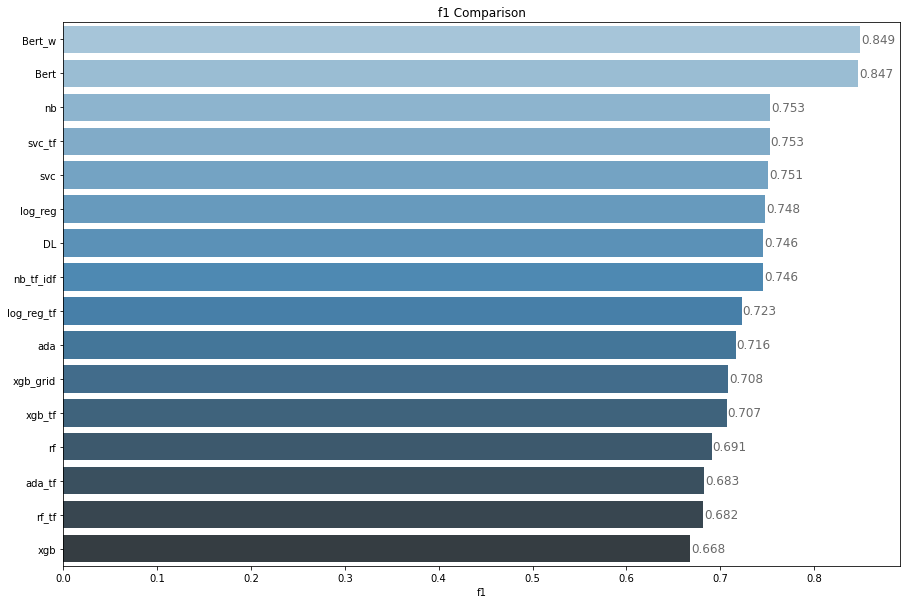

In [232]:
plt.figure(figsize=(15,10))
df_results = df_results.sort_values(by="f1", ascending=False)
ax=sns.barplot(x="f1", y=df_results.index, data=df_results, palette="Blues_d")
for i in ax.patches:
    ax.text(i.get_width()+.001, i.get_y()+.5, \
            str(round((i.get_width()), 3)), fontsize=12, color='dimgrey')
ax.set_title("f1 Comparison")
plt.show()

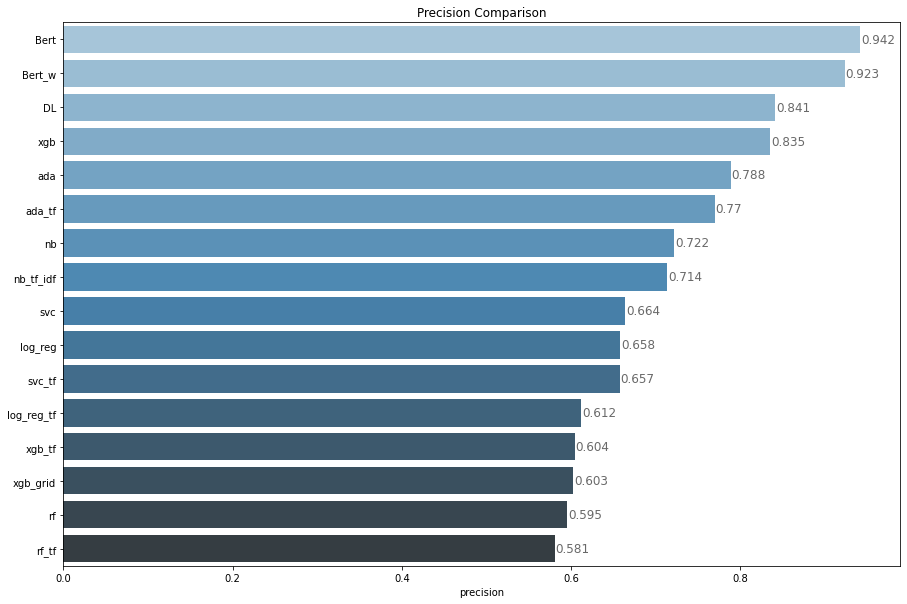

In [233]:
plt.figure(figsize=(15,10))
df_results = df_results.sort_values(by="precision", ascending=False)
ax=sns.barplot(x="precision", y=df_results.index, data=df_results, palette="Blues_d")
for i in ax.patches:
    ax.text(i.get_width()+.001, i.get_y()+.5, \
            str(round((i.get_width()), 3)), fontsize=12, color='dimgrey')
ax.set_title("Precision Comparison")
plt.show()

### Conclusion

**It is seemed that Bert weighted model is the best model.**

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___